In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

# 11. Normal-Cauchy Gibbs Sampler*

Adapted from [Unit 5: norcaugibbs.m](https://raw.githubusercontent.com/areding/6420-pymc/main/original_examples/Codes4Unit5/norcaugibbs.m).

## Normal-Cauchy model

Our model is:

$$
\begin{align*}
X|\theta &\sim \mathcal{N}(\theta, 1)\\
\theta &\sim \mathcal{Ca}(0,1) \\
\end{align*}
$$

The problem is there's only one parameter, $\theta$, to simulate. The professor extends the model with the following property of the Cauchy distribution:

$$
   \begin{align*}
   \theta \,|\, \lambda &\sim \mathcal{N}\left(\mu, \frac{\tau^2}{\lambda}\right) \\
   \lambda &\sim \text{Ga}\left(\frac{1}{2}, \frac{1}{2}\right) \\
   \end{align*}
$$

which makes our full model:

$$
\begin{align*}
X|\theta &\sim \mathcal{N}\left(\theta, 1\right)\\
   \theta \,|\, \lambda &\sim \mathcal{N}\left(\mu, \frac{\tau^2}{\lambda}\right) \\
   \lambda &\sim \text{Ga}\left(\frac{1}{2}, \frac{1}{2}\right) \\
   \end{align*}
$$

You can read more about this parameter expansion approach [here](https://betanalpha.github.io/assets/case_studies/fitting_the_cauchy.html#3_first_alternative_implementation).

The lecture slide says we're looking for $\delta(2)$. The lecture doesn't really clarify that notation, but in the code $x=2$ as our sole datapoint, so that must be what the professor meant.

In [5]:
rng = np.random.default_rng(1)

obs = 100000
burn = 1000

# params
x = 2
sigma2 = 1
tau2 = 1
mu = 0

# inits
theta = 0
lam = 1

thetas = np.zeros(obs)
lambdas = np.zeros(obs)

randn = rng.standard_normal(obs)

for i in tqdm(range(obs)):
    d = tau2 + lam * sigma2
    theta = (tau2 / d * x + lam * sigma2 / d * mu) + np.sqrt(tau2 * sigma2 / d) * randn[
        i
    ]
    lam = rng.exponential(1 / ((tau2 + (theta - mu) ** 2) / (2 * tau2)))

    thetas[i] = theta
    lambdas[i] = lam

thetas = thetas[burn:]
lambdas = lambdas[burn:]

  0%|          | 0/100000 [00:00<?, ?it/s]

np.mean(thetas)=1.2810728558916804
np.var(thetas)=0.860464992070327
np.mean(lambdas)=0.9408560283549908
np.var(lambdas)=1.5703387617734375


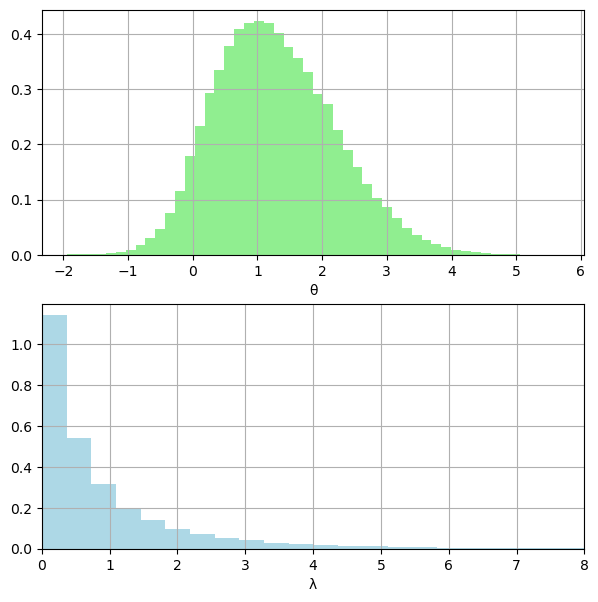

In [8]:
print(f"{np.mean(thetas)=}")
print(f"{np.var(thetas)=}")
print(f"{np.mean(lambdas)=}")
print(f"{np.var(lambdas)=}")

# posterior densities
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))

ax1.grid(True)
ax1.hist(thetas, color="lightgreen", density=True, bins=50)
ax1.set_xlabel("θ")

ax2.grid(True)
ax2.hist(lambdas, color="lightblue", density=True, bins=50)
ax2.set_xlabel("λ")
ax2.set_xlim(0, 8)

plt.show()

In [9]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Tue Aug 22 2023

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

numpy     : 1.24.4
matplotlib: 3.7.2

